In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [28]:
pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 kB 1.5 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [29]:
df=pd.read_excel('/kaggle/input/dataset-19/dataset-19.xlsx',sheet_name='Datanew')

In [30]:
X=df.drop(columns=['Directed'])
y=df['Directed']
df

,Diseases,Sym1,Sym2,Sym3,Sym4,Sym5,Sym6,Sym7,Directed
0,pain,wrist_or_hand_or_knee_or_neck_or_joints,less_than1week,not_tried,NaN,NaN,NaN,NaN,pharmacy
1,pain,wrist_or_hand_or_knee_or_neck_or_joints,less_than2week,not_tried,NaN,NaN,NaN,NaN,pharmacy
2,pain,wrist_or_hand_or_knee_or_neck_or_joints,greater_than2week,not_tried,NaN,NaN,NaN,NaN,pharmacy
3,pain,wrist_or_hand_or_knee_or_neck_or_joints,less_than1week,Paracetamol,NaN,NaN,NaN,NaN,pharmacy
4,pain,wrist_or_hand_or_knee_or_neck_or_joints,less_than2week,Paracetamol,NaN,NaN,NaN,NaN,physio
...,...,...,...,...,...,...,...,...,...
1723,head_ache,head_or_sides_of_head,less_than2week,other_painkillers,migrane_or_sinus_or_cluster_headache,loss_sensation,blurred_vision_or_drowsy_or_confused_or_jaw_or...,anxiety,physio
1724,head_ache,head_or_sides_of_head,greater_than2week,other_painkillers,migrane_or_sinus_or_cluster_headache,loss_sensation,blurred_vision_or_drowsy_or_confused_or_jaw_or...,anxiety,physio
1725,head_ache,head_or_sides_of_head,less_than1week,ibuprofen,migrane_or_sinus_or_cluster_headache,loss_sensation,blurred_vision_or_drowsy_or_confused_or_jaw_or...,anxiety,physio
1726,head_ache,head_or_sides_of_head,less_than2week,ibuprofen,migrane_or_sinus_or_cluster_headache,loss_sensation,blurred_vision_or_drowsy_or_confused_or_jaw_or...,anxiety,physio


<AxesSubplot:>

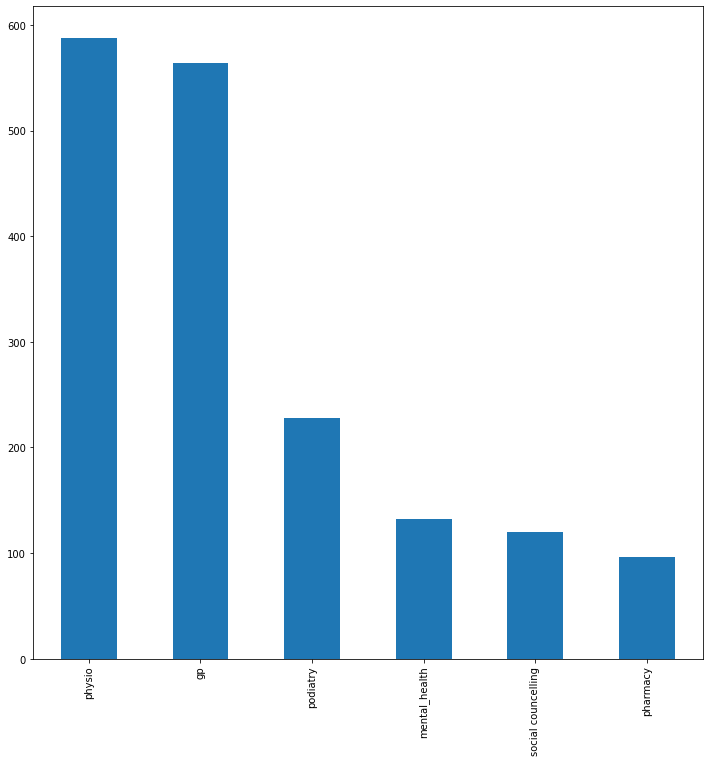

In [31]:
plt.figure(figsize=(12,12))
df.Directed.value_counts().plot(kind='bar')

In [32]:
#Renaming col names
list1=[i for i in range(9)]
new_Index=[str(i) for i in list1]
df.columns=new_Index
df.head()


,0,1,2,3,4,5,6,7,8
0,pain,wrist_or_hand_or_knee_or_neck_or_joints,less_than1week,not_tried,NaN,NaN,NaN,NaN,pharmacy
1,pain,wrist_or_hand_or_knee_or_neck_or_joints,less_than2week,not_tried,NaN,NaN,NaN,NaN,pharmacy
2,pain,wrist_or_hand_or_knee_or_neck_or_joints,greater_than2week,not_tried,NaN,NaN,NaN,NaN,pharmacy
3,pain,wrist_or_hand_or_knee_or_neck_or_joints,less_than1week,Paracetamol,NaN,NaN,NaN,NaN,pharmacy
4,pain,wrist_or_hand_or_knee_or_neck_or_joints,less_than2week,Paracetamol,NaN,NaN,NaN,NaN,physio


In [33]:
df['Symptoms']=''
symp=[]
for i in range(len(df)) :
    symp.append(' '.join(str(x) for x in df.iloc[i,0:7]))
    
for i in range(len(df)):
    df['Symptoms'][i]=symp[i]


In [34]:
df=df[['8','Symptoms']].copy()
df.head()
#df.iloc[0]
df.Symptoms[0]

'pain wrist_or_hand_or_knee_or_neck_or_joints less_than1week not_tried nan nan nan'

In [35]:
data=df.rename({'8':'Department','Symptoms':'Symptoms'},axis=1)
data

,Department,Symptoms
0,pharmacy,pain wrist_or_hand_or_knee_or_neck_or_joints l...
1,pharmacy,pain wrist_or_hand_or_knee_or_neck_or_joints l...
2,pharmacy,pain wrist_or_hand_or_knee_or_neck_or_joints g...
3,pharmacy,pain wrist_or_hand_or_knee_or_neck_or_joints l...
4,physio,pain wrist_or_hand_or_knee_or_neck_or_joints l...
...,...,...
1723,physio,head_ache head_or_sides_of_head less_than2week...
1724,physio,head_ache head_or_sides_of_head greater_than2w...
1725,physio,head_ache head_or_sides_of_head less_than1week...
1726,physio,head_ache head_or_sides_of_head less_than2week...


<AxesSubplot:>

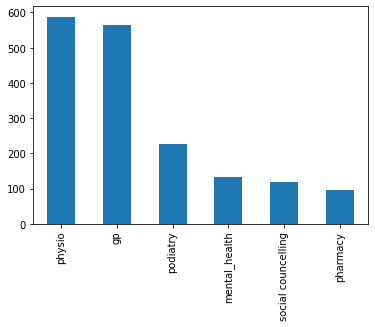

In [36]:
data.Department.value_counts().plot(kind='bar')

## Removing nan and stopwords

In [37]:
import re
import nltk
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
ps=PorterStemmer()
corpus=[]

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = re.sub('nan', '',text)
    text = re.sub('_', ' ',text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text
    
data['Symptoms'] = data['Symptoms'].apply(clean_text)

## Check no. of words 

In [39]:
data['Symptoms'].apply(lambda x: len(x.split(' '))).sum()
data

,Department,Symptoms
0,pharmacy,pain wrist hand knee neck joints less than1wee...
1,pharmacy,pain wrist hand knee neck joints less than2wee...
2,pharmacy,pain wrist hand knee neck joints greater than2...
3,pharmacy,pain wrist hand knee neck joints less than1wee...
4,physio,pain wrist hand knee neck joints less than2wee...
...,...,...
1723,physio,head ache head sides head less than2week paink...
1724,physio,head ache head sides head greater than2week pa...
1725,physio,head ache head sides head less than1week ibupr...
1726,physio,head ache head sides head less than2week ibupr...


In [40]:
data['Symptoms'][0]

'pain wrist hand knee neck joints less than1week tried'

## Encoding the labels

In [41]:
possible_labels = data.Department.unique()

label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index
label_dict

{'pharmacy': 0,
 'physio': 1,
 'gp': 2,
 'podiatry': 3,
 'mental_health': 4,
 'social councelling': 5}

In [42]:
data['label'] = data.Department.replace(label_dict)
data

,Department,Symptoms,label
0,pharmacy,pain wrist hand knee neck joints less than1wee...,0
1,pharmacy,pain wrist hand knee neck joints less than2wee...,0
2,pharmacy,pain wrist hand knee neck joints greater than2...,0
3,pharmacy,pain wrist hand knee neck joints less than1wee...,0
4,physio,pain wrist hand knee neck joints less than2wee...,1
...,...,...,...
1723,physio,head ache head sides head less than2week paink...,1
1724,physio,head ache head sides head greater than2week pa...,1
1725,physio,head ache head sides head less than1week ibupr...,1
1726,physio,head ache head sides head less than2week ibupr...,1


## Perform train test split 

In [43]:
X=data.Symptoms
y=data.Department

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(data.index.values, 
                                                  data.label.values, 
                                                  test_size=0.15, 
                                                  random_state=42, 
                                                  stratify=data.label.values)

data['data_type'] = ['not_set']*data.shape[0]

data.loc[X_train, 'data_type'] = 'train'
data.loc[X_val, 'data_type'] = 'val'

data.groupby(['Department', 'label', 'data_type']).count()

Symptoms
Department         label data_type          
gp                 2     train           479
                         val              85
mental_health      4     train           112
                         val              20
pharmacy           0     train            82
                         val              14
physio             1     train           499
                         val              89
podiatry           3     train           194
                         val              34
social councelling 5     train           102
                         val              18

In [44]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub
#import tensorflow_text as text

## Transform to vector using bert

In [45]:
import numpy as np
seq_len=512
num_samples=len(data)

Xids=np.zeros((num_samples,seq_len))
Xmask=np.zeros((num_samples,seq_len))

Xids.shape

(1728, 512)

In [46]:
from transformers import BertTokenizer

In [47]:
tokenizer= BertTokenizer.from_pretrained('bert-base-cased')

for i,phrase in enumerate(data['Symptoms']):
    tokens=tokenizer.encode_plus(phrase,max_length=seq_len,truncation=True,
                                padding='max_length',add_special_tokens=True,
                                return_tensors='tf')
    Xids[i,:]=tokens['input_ids']
    Xmask[i,:]=tokens['attention_mask']

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

2022-08-21 13:17:49.487646: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-21 13:17:49.614067: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-21 13:17:49.614902: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-21 13:17:49.616510: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [48]:
Xids#

array([[  101.,  2489.,  6703., ...,     0.,     0.,     0.],
       [  101.,  2489.,  6703., ...,     0.,     0.,     0.],
       [  101.,  2489.,  6703., ...,     0.,     0.,     0.],
       ...,
       [  101.,  1246., 12953., ...,     0.,     0.,     0.],
       [  101.,  1246., 12953., ...,     0.,     0.,     0.],
       [  101.,  1246., 12953., ...,     0.,     0.,     0.]])

In [49]:
Xmask#control for the attention layer within bert

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]])

In [50]:
#one hot encoding dept labels 
dept_labels = data['label'].values
dept_labels

array([0, 0, 0, ..., 1, 1, 1])

In [51]:
labels = np.zeros((num_samples,dept_labels.max()+1))
labels.shape

(1728, 6)

In [52]:
labels[np.arange(num_samples),dept_labels]=1

In [53]:
labels

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.]])

## Changing format into format for bert i/p


In [54]:
dataset= tf.data.Dataset.from_tensor_slices((Xids,Xmask,labels))
dataset.take(1)

<TakeDataset shapes: ((512,), (512,), (6,)), types: (tf.float64, tf.float64, tf.float64)>

## Merging Xids and Xmask (i/p tensors) into a single dictionary(tf expects i/p with index 0 as i/p and index 1 as target 

In [55]:
def map_func(input_ids,masks,labels):
    return {'input_ids':input_ids,'attention_mask':masks},labels

In [56]:
dataset=dataset.map(map_func)

In [57]:
dataset.take(1)

<TakeDataset shapes: ({input_ids: (512,), attention_mask: (512,)}, (6,)), types: ({input_ids: tf.float64, attention_mask: tf.float64}, tf.float64)>

In [58]:
batch_size=8

dataset=dataset.shuffle(10000).batch(batch_size,drop_remainder=True)

dataset.take(1)

<TakeDataset shapes: ({input_ids: (8, 512), attention_mask: (8, 512)}, (8, 6)), types: ({input_ids: tf.float64, attention_mask: tf.float64}, tf.float64)>

In [59]:
split=0.9
size=int((num_samples/batch_size)*split)

In [60]:
train_ds=dataset.take(size)
val_ds=dataset.skip(size)

del dataset

In [61]:
from transformers import TFAutoModel

bert=TFAutoModel.from_pretrained('bert-base-uncased')

bert

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/511M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [62]:
bert.summary()

Model: "tf_bert_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bert (TFBertMainLayer)       multiple                  109482240 
Total params: 109,482,240
Trainable params: 109,482,240
Non-trainable params: 0
_________________________________________________________________


In [63]:
input_ids=tf.keras.layers.Input(shape=(seq_len),name='input_ids',dtype='int32')
mask=tf.keras.layers.Input(shape=(seq_len),name='attention_mask',dtype='int32')

embeddings=bert.bert(input_ids,attention_mask=mask)[1]

x=tf.keras.layers.Dense(1024,activation='relu')(embeddings)
y=tf.keras.layers.Dense(dept_labels.max()+1,activation='softmax',name='outputs')(x)

In [64]:
model=tf.keras.Model(inputs=[input_ids,mask],outputs=y)

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ids (InputLayer)          [(None, 512)]        0                                            
__________________________________________________________________________________________________
attention_mask (InputLayer)     [(None, 512)]        0                                            
__________________________________________________________________________________________________
bert (TFBertMainLayer)          TFBaseModelOutputWit 109482240   input_ids[0][0]                  
                                                                 attention_mask[0][0]             
__________________________________________________________________________________________________
dense (Dense)                   (None, 1024)         787456      bert[0][1]                   

In [65]:
optimizer= tf.keras.optimizers.Adam(lr=1e-5,decay=1e-6)
loss=tf.keras.losses.CategoricalCrossentropy()
acc = tf.keras.metrics.CategoricalAccuracy('accuracy')

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.


In [66]:
model.compile(optimizer=optimizer,loss=loss,metrics=[acc])

In [ ]:
history = model.fit(
train_ds,
validation_data=val_ds,
epochs=3)

Epoch 1/3
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2022-08-21 13:18:38.474910: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


 49/194 [======>.......................] - ETA: 1:19 - loss: 1.4373 - accuracy: 0.4770

In [ ]:
model.save('Bert_for_nhs')

In [25]:
!pip3 install --upgrade tensorflow  
import tensorflow as tf
print(tf.__version__)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 1.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 8.8 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 36.8 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 65.2 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 38.2 MB/s eta 0:00:0000:0100:01m
  Attempting uninstall: keras
    Found existing installation: keras 2.6.0
    Uninstalling keras-2.6.0:
      Successfully uninstalled keras-2.6.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.6.0
    Uninstalling tensorboard-2.6.0

In [13]:
model=tf.keras.models.load_model('/kaggle/output/Bert_for_nhs')
model.summary()

OSError: SavedModel file does not exist at: /kaggle/output/Bert_for_nhs/{saved_model.pbtxt|saved_model.pb}

In [21]:
import os 
os.chdir(r'/kaggle/working')

from IPython.display import FileLink
FileLink(r'/kaggle/output/Bert_for_nhs')

/kaggle/output/Bert_for_nhs